In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
files = os.listdir(r"C:\Users\bhupe\OneDrive\Desktop\Portfolio Project\Python Project\Udemy\Stock Market Data Analysis\individual_stocks_5yr\individual_stocks_5yr")
len(files)

509

In [4]:
all_data = pd.DataFrame()
all_data

""


In [5]:
path = r"C:\Users\bhupe\OneDrive\Desktop\Portfolio Project\Python Project\Udemy\Stock Market Data Analysis\individual_stocks_5yr\individual_stocks_5yr"
for file in files:
    data = pd.read_csv(path + "/" + file)
    all_data = pd.concat([all_data, data])

In [41]:
stocks = all_data.copy()
stocks.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


# Change Data Types and Handle Null Values

In [75]:
stocks["Name"].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [8]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624076 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    624076 non-null  object 
 1   open    624065 non-null  float64
 2   high    624068 non-null  float64
 3   low     624068 non-null  float64
 4   close   624076 non-null  float64
 5   volume  624076 non-null  int64  
 6   Name    624076 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 38.1+ MB


In [9]:
stocks.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [49]:
stocks["date"] = stocks["date"].astype("datetime64")
# stocks.set_index("date", drop = True, inplace = True)
stocks.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [43]:
stocks[stocks["open"].isnull()]

,date,open,high,low,close,volume,Name
7,2017-07-26,NaN,NaN,NaN,69.0842,3,BHF
598,2015-07-17,NaN,88.76,88.24,88.7200,2056819,DHR
721,2016-01-12,NaN,NaN,NaN,88.5500,0,DHR
603,2015-07-17,NaN,48.49,47.85,47.9200,1246786,ES
0,2016-07-01,NaN,NaN,NaN,49.5400,0,FTV
597,2015-07-17,NaN,47.31,46.83,46.9900,1229513,O
720,2016-01-12,NaN,NaN,NaN,52.4300,0,O
586,2015-06-09,NaN,NaN,NaN,526.0900,12135,REGN
0,2016-04-07,NaN,NaN,NaN,41.5600,0,UA
567,2015-05-12,NaN,NaN,NaN,124.0800,569747,VRTX


# 1. Analyse Closing Price of Stocks and Volume Trading

In [77]:
# Take top companies stocks
company_list = ["AAPL_data.csv", "AMZN_data.csv","GOOGL_data.csv","MSFT_data.csv"]

path = 'C:\\Users\\bhupe\\OneDrive\\Desktop\\Portfolio Project\\Python Project\\Udemy\\Stock Market Data Analysis\\individual_stocks_5yr\\individual_stocks_5yr'

tech_stocks = pd.DataFrame()

for company in company_list:
    data = pd.read_csv(path + "/" + company)
    tech_stocks = pd.concat([tech_stocks, data])
    


In [79]:
tech_stocks["date"] = tech_stocks["date"].astype("datetime64")
tech_stocks.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [45]:
# let's check with apple stocks
apple_stocks = stocks[stocks["Name"] == "AAPL"]
apple_stocks.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


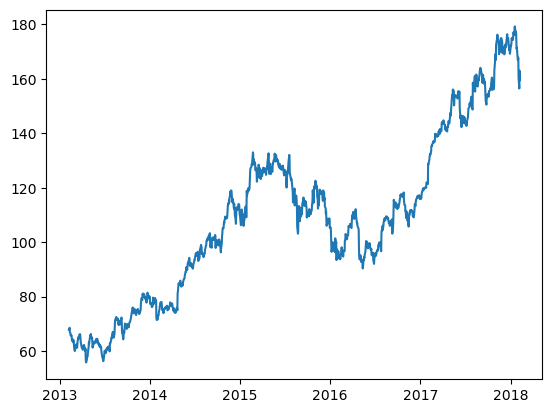

In [74]:
plt.plot("date", "close" , data = apple_stocks)

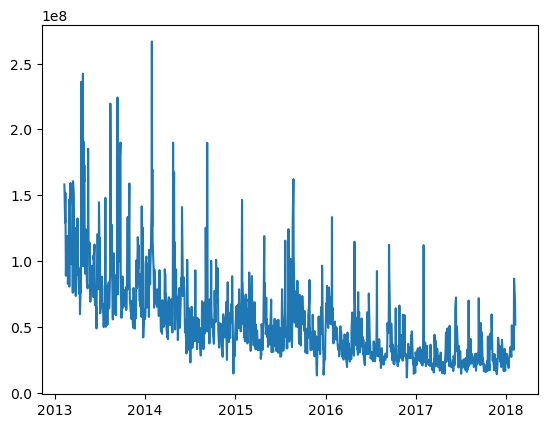

In [47]:
plt.plot(apple_stocks["date"], apple_stocks["volume"])

In [54]:
apple_stocks["Year"] = apple_stocks["date"].dt.year
apple_stocks["Month"] = apple_stocks["date"].dt.month
apple_stocks["day"] = apple_stocks["date"].dt.day
apple_stocks.head()

C:\Users\bhupe\AppData\Local\Temp\ipykernel_3964\1692290199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stocks["Year"] = apple_stocks["date"].dt.year
C:\Users\bhupe\AppData\Local\Temp\ipykernel_3964\1692290199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stocks["Month"] = apple_stocks["date"].dt.month
C:\Users\bhupe\AppData\Local\Temp\ipykernel_3964\1692290199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,date,open,high,low,close,volume,Name,Year,Month,day
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,2013,2,8
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,2013,2,11
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,2013,2,12
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,2013,2,13
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,2013,2,14


<BarContainer object of 251 artists>

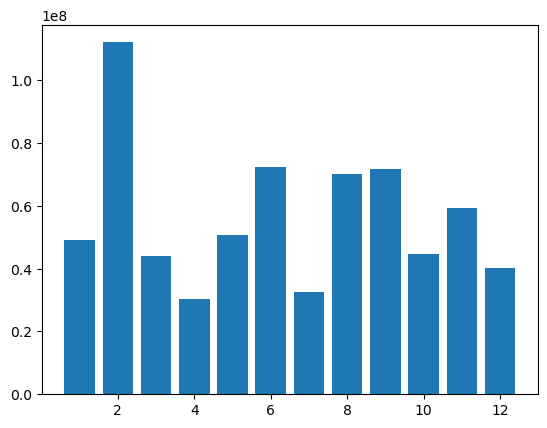

In [68]:
apple_2017 = apple_stocks[apple_stocks["Year"] == 2017].sort_values("Month")
plt.bar("Month", "volume", data = apple_2017)

<BarContainer object of 252 artists>

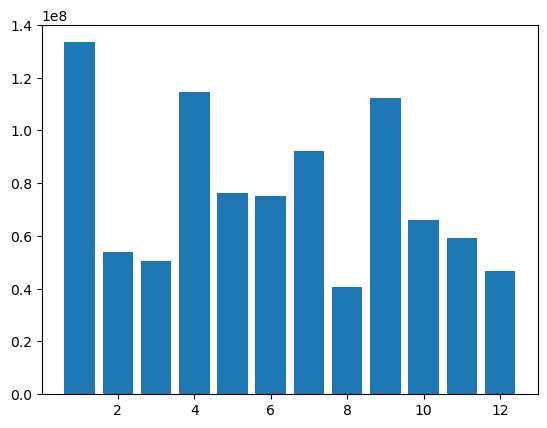

In [69]:
apple_2016 = apple_stocks[apple_stocks["Year"] == 2016].sort_values("Month")
plt.bar("Month", "volume", data = apple_2016)

<AxesSubplot:>

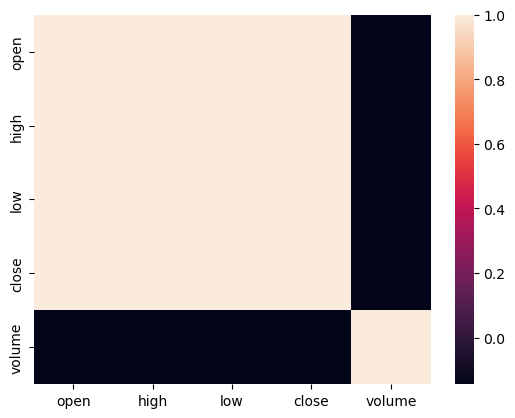

In [70]:
sns.heatmap(stocks.corr())